<a href="https://colab.research.google.com/github/sury1999/Data-Analysis-Projects/blob/main/Grip_Task_3_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**THE SPARKS FOUNDATION**
##**BUSINESS ANALYTICS INTERNSHIP**
##**GRIP TASK3**
● Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’

● As a business manager, try to find out the weak areas where you can
work to make more profit.

● What all business problems you can derive by exploring the data?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/SampleSuperstore.csv')
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164



####**1:  The pie chart below show the region wise sales of a particular super store based in USA. We can see that the Southern region experiences the least number of sales while the Eastern region has the maximum. In contrast to this it can be seen that profits for Central region is the least which means that business strategy for that region needs to be adjusted.**

[Text(0.5, 1.0, 'Regionwise Profits')]

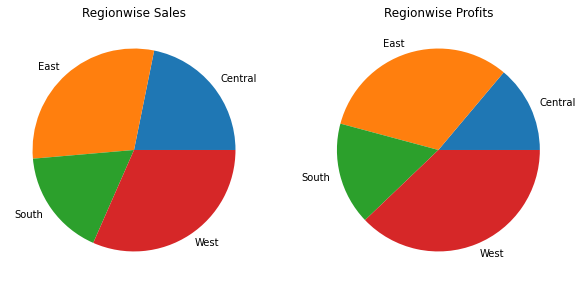

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
g1 = df.groupby('Region')['Sales'].sum()
g2 = df.groupby('Region')['Profit'].sum()
ax[0].pie(g1, labels=g1.index)
ax[1].pie(g2, labels=g2.index)
ax[0].set(title='Regionwise Sales')
ax[1].set(title='Regionwise Profits')

###**A stacked bar graph to better show how they relate**

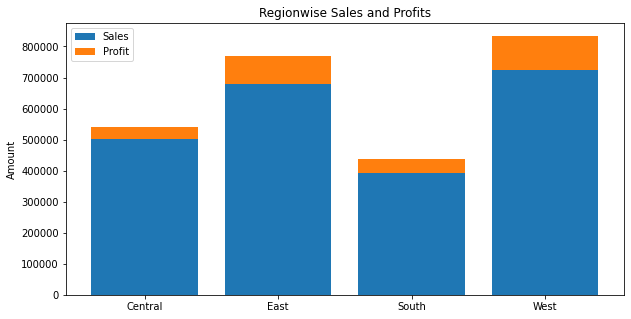

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
gb1 = plt.bar([0, 1, 2, 3], g1)
gb2 = plt.bar([0, 1, 2, 3], g2, bottom=g1)

plt.ylabel('Amount')
plt.title('Regionwise Sales and Profits')
plt.xticks([0, 1, 2, 3], ('Central', 'East', 'South', 'West'))
plt.legend((gb1[0], gb2[0]), ('Sales', 'Profit'))

plt.show()


###**On further investigation of the problem, we can see that maximum discounts are being by the central branch which is leading to a decrease in the profit margins even though the sales volume is pretty high. Discounts offered in the central branches need to be reduced**

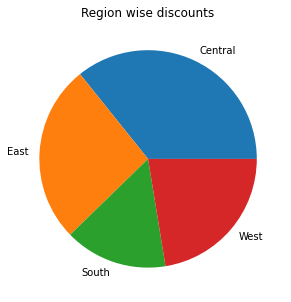

In [7]:
df.groupby('Region')['Discount'].sum().plot(kind='pie', title='Region wise discounts', ylabel='', figsize=(10,5))

###**Next we will check the sales/profit per shop of each individual region**
####As we can see frm the graph below, sales wise the most efficient region is the southern region which indicates that although their volume of sales and profit is less, they are working better per shop than the other branches. Meanwhile profit wise the most efficient branch is the western region which is the best region for efficiency as their profit per shop is highest even though their sales are third highest. Compared to them the central branch is doing very poorly especially on profit on a per shop basis and need to be managed in a better way

[Text(0.5, 1.0, 'Profit per shop regionwise')]

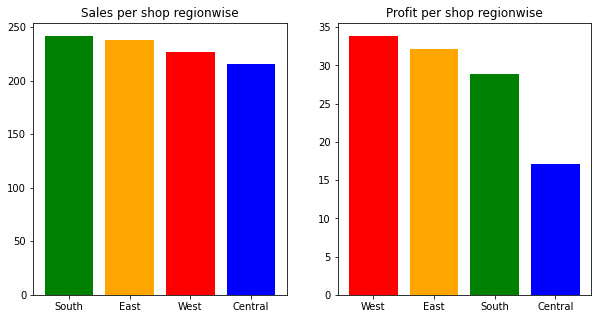

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
n1 = df.groupby('Region')['Sales'].sum() / df.groupby('Region')['State'].count()  
n2 = df.groupby('Region')['Profit'].sum() / df.groupby('Region')['State'].count()
n1 = n1.sort_values(ascending=False)
n2 = n2.sort_values(ascending=False)
ax[0].bar(['South', 'East', 'West', 'Central'], n1, color= ['green', 'orange', 'red', 'blue'])
ax[0].set(title='Sales per shop regionwise')
ax[1].bar(['West', 'East', 'South', 'Central'], n2, color= ['red', 'orange', 'green', 'blue'])
ax[1].set(title='Profit per shop regionwise')


##Ship Mode, Segment and Category and other criteria analysis

In [16]:
df.groupby('Category')['Category'].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Category, dtype: int64

In [17]:
df.groupby('Segment')['Segment'].count()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [18]:
df.groupby('Ship Mode')['Ship Mode'].count()

Ship Mode
First Class       1538
Same Day           543
Second Class      1945
Standard Class    5968
Name: Ship Mode, dtype: int64

In [9]:
df.groupby('Region')['Region'].count()

Region
Central    2323
East       2848
South      1620
West       3203
Name: Region, dtype: int64

<BarContainer object of 5 artists>

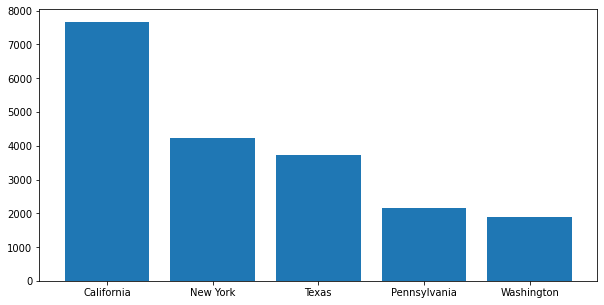

In [10]:
ymax = pd.Series(df.groupby('State')['Quantity'].sum().sort_values(ascending=False).head(5))
xmax = pd.Series(ymax.index.values)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xmax, ymax)


<BarContainer object of 5 artists>

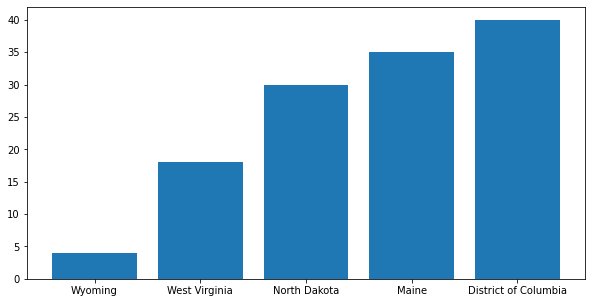

In [11]:
ymin = pd.Series(df.groupby('State')['Quantity'].sum().sort_values(ascending=True).head(5))
xmin = pd.Series(ymin.index.values)
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(xmin, ymin)

<BarContainer object of 10 artists>

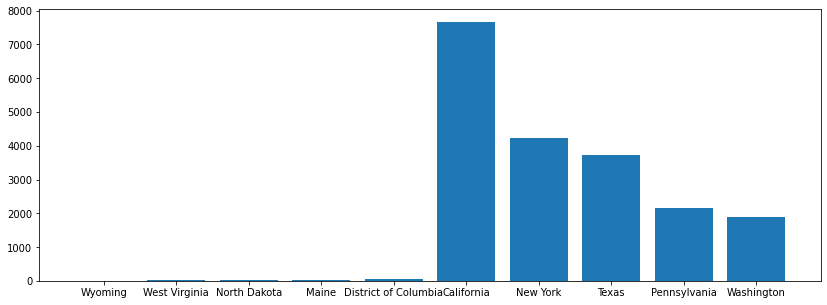

In [12]:
x3 = xmin.append(xmax, ignore_index=True)
y3 = ymin.append(ymax, ignore_index=True)
fig, ax = plt.subplots(figsize=(14, 5))
ax.bar(x3, y3)


##**Relation b/w Discount, Sales and Profit**

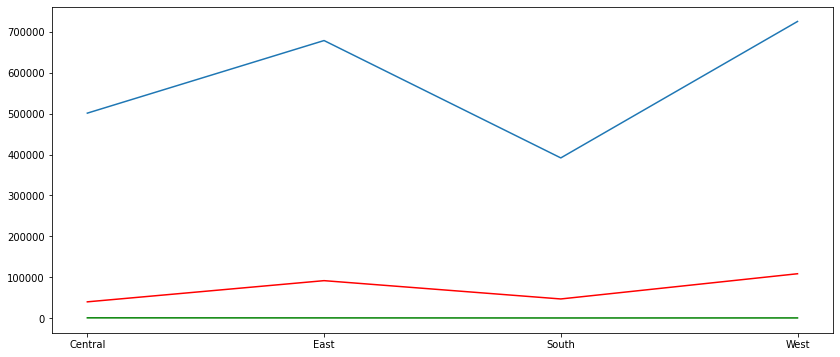

In [13]:
fig, ax = plt.subplots(figsize=(14,6))
plt.plot(df.groupby('Region')['Sales'].sum())
plt.plot(df.groupby('Region')['Profit'].sum(), 'r')
plt.plot(df.groupby('Region')['Discount'].sum(), color='green')